In [5]:
#general imports
import numpy as np
np.random.seed(123)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convulation2D, MaxPooling2D

from keras.utils import np_utils

In [13]:
#import database
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print( X_train.shape )
#Output: 60000, 28, 28
#This means there are 60000 samples and immage has a sample pixel of 28x28

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)


(60000, 28, 28)


In [16]:
#Building the model
model = tf.keras.models.Sequential()
#input layer:
model.add(tf.keras.layers.Flatten())
#2 hidden layers:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

2022-11-19 22:44:52.474661: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-19 22:44:52.477863: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-19 22:44:52.479662: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neilb-ZenBook-UX562FA-UX562FA): /proc/driver/nvidia/version does not exist
2022-11-19 22:44:52.507973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
#Training the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #use binary loss in case of cats vs dogs

model.fit(x_train, y_train, epochs=3)

2022-11-19 22:48:16.993059: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2602 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1070 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9770


In [18]:
#Checking if model learned patterns and attributes 
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0833 - accuracy: 0.9742
0.08328073471784592 0.9742000102996826


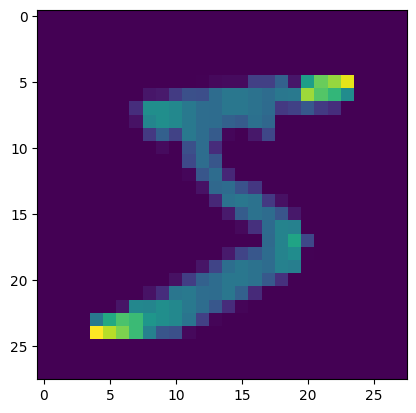

In [15]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [22]:
model.save('num_reader.model')
new_model = tf.keras.models.load_model('num_reader.model')
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))

INFO:tensorflow:Assets written to: num_reader.model/assets


INFO:tensorflow:Assets written to: num_reader.model/assets


313/313 [==============================] - 0s 1ms/step
7


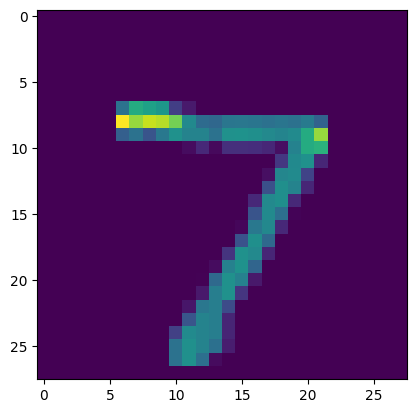

In [23]:
plt.imshow(x_test[0])
plt.show()